<a href="https://colab.research.google.com/github/Areefahnk/NNDL-18K41A0505/blob/main/Assignment_03_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression Model using Stochastic Gradient Descent Optimizer**

**By - Areefa (18K41A0505)**

In [290]:
import sympy as sym
from sympy import *
import random

**Simple Linear Refression Model using Stochastic Gradient Descent Optimizer**

In [291]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/samples.xlsx')
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


In [292]:
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


**STEP 2 Missing Values treatment**

**Found no missing values after visualizing datset**

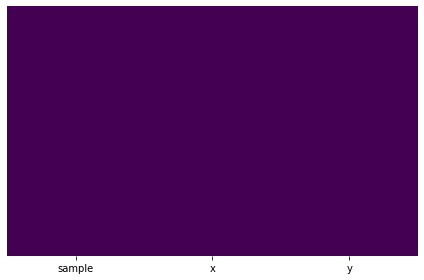

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [294]:
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


**STEP 3: Outlier Data Treatment**

In [295]:
import numpy as np
#df = pd.DataFrame({'Data':np.random.normal(size=200)})
# example dataset of normally distributed data. 

#df[np.abs(df.sample-df.sample.mean()) <= (3*df.sample.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'sample'.
df[np.abs(df.x-df.x.mean()) <= (3*df.x.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'x'.
df[np.abs(df.y-df.y.mean()) <= (3*df.y.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'y'.

#df[~(np.abs(df.x-df.x.mean()) > (3*df.x.std()))]
# or if you prefer the other way around

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


**NORMALIZATION - MIN MAX SCALING**

In [296]:
def min_max_scaling(df):
  df_norm = df.copy()
  #apply min max scaling
  ct=0
  for column in df_norm.columns:
    if ct==0: #to skip normalization for the sample number column
      ct=1
    else:
      df_norm[column]=(df_norm[column]-df_norm[column].min())/(df_norm[column].max()-df_norm[column].min())
  return df_norm

df_norm = min_max_scaling(df)
df_norm

,sample,x,y
0,1,0.000000,0.000000
1,2,0.333333,0.333333
2,3,0.666667,0.666667
3,4,1.000000,1.000000


**SPLITTING OF DATASET**

In [297]:
x_train = df_norm.iloc[0:3,1:2]
y_train = df_norm.iloc[0:3,2:]
x_test = df_norm.iloc[3:,1:2]
y_test = df_norm.iloc[3:,2:]

In [298]:
x_train

,x
0,0.000000
1,0.333333
2,0.666667


In [299]:
x_test

,x
3,1.0


In [300]:
y_test

,y
3,1.0


In [304]:
#step 1 : initialize model params
m=1
c=-1
n=0.1
epochs = 120
iter =1
#ns = df.shape[0]
ns = len(x_train)

#step 2: start iteration and update iter
#iter = iter+1
for iter in range(1,epochs+1):
    #step 3: track samples
    #sample =1
    print("ITERATION : {}".format(iter))
    for sample in range(0,ns):
      x = x_train['x'][sample].round(2)
      y = y_train['y'][sample].round(2)
      print("Sample {} ".format(sample+1)+"x = {}".format(x)+"y = {}".format(y))
      #print("sample {}".format(x)+" {}".format(y))
      #step 4 calculate gradient wrto each model param
      deltaE_m = -(y-m*x-c)*x
      deltaE_c = -(y-m*x-c)
      #step 5 : calculate change
      del_m = -n*deltaE_m
      del_c = -n*deltaE_c
      #step 6: update model params
      m = m+del_m
      c = c+del_c
      print("m: {}".format(m)+" c = {}".format(c))
print("---------------------------------------------------------------")
print('Optimal Values')
print('m = {}'.format(m))
print('c = {}'.format(c))




#step 4: calculate error


ITERATION : 1
Sample 1 x = 0.0y = 0.0
m: 1.0 c = -0.9
Sample 2 x = 0.33y = 0.33
m: 1.0297 c = -0.81
Sample 3 x = 0.67y = 0.67
m: 1.082636767 c = -0.7309899000000001
ITERATION : 2
Sample 1 x = 0.0y = 0.0
m: 1.082636767 c = -0.6578909100000001
Sample 2 x = 0.33y = 0.33
m: 1.1034472526373702 c = -0.5948288323110001
Sample 3 x = 0.67y = 0.67
m: 1.1386570372313156 c = -0.5422769150066039
ITERATION : 3
Sample 1 x = 0.0y = 0.0
m: 1.1386570372313156 c = -0.4880492235059435
Sample 2 x = 0.33y = 0.33
m: 1.1532526864715626 c = -0.44381998338398254
Sample 3 x = 0.67y = 0.67
m: 1.176109112262581 c = -0.40970591503917897
ITERATION : 4
Sample 1 x = 0.0y = 0.0
m: 1.176109112262581 c = -0.36873532353526106
Sample 2 x = 0.33y = 0.33
m: 1.1863595497067052 c = -0.3376733918864001
Sample 3 x = 0.67y = 0.67
m: 1.2006179867767601 c = -0.3163921425281093
ITERATION : 5
Sample 1 x = 0.0y = 0.0
m: 1.2006179867767601 c = -0.2847529282752984
Sample 2 x = 0.33y = 0.33
m: 1.2078301035338461 c = -0.26289802901140163


In [256]:
df_norm

,sample,x,y
0,1,0.000000,0.000000
1,2,0.333333,0.333333
2,3,0.666667,0.666667
3,4,1.000000,1.000000


**DENORMALIZING**

In [257]:
def denormalize_fun(df):
  df_denormal = df.copy()
  #apply min max scaling
  ct=0
  for column in df_denormal.columns:
    if ct==0: #to skip normalization for the sample number column
      ct=1
    else:
      df_denormal[column]=(df[column])*(df_denormal[column].max()-df_denormal[column].min())+(df_denormal[column].min())
  return df_denormal

res_df = denormalize_fun(df_norm)

**ORIGINAL DATASET**

In [258]:
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6


**CALCULATING THE TRAINING ERROR**

Train and test datasets

In [259]:
x_train = df.iloc[0:3,1:2]
y_train = df.iloc[0:3,2:]
x_test = df.iloc[3:,1:2]
y_test = df.iloc[3:,2:]

In [260]:
x_train

,x
0,0.2
1,0.4
2,0.6


In [261]:
y_train

,y
0,3.4
1,3.8
2,4.2


In [262]:
print("m and c values after applying SGD Algo:")
print(m)
print(c)

m and c values after applying SGD Algo:
2.2054170084884834
2.912263028069261


In [263]:
y_train_pred = []
for i in range(0,len(x_train)):
  ycalc = m*x_train['x'][i]+c
  y_train_pred.append(ycalc)
y_train_pred

[3.3533464297669577, 3.7944298314646545, 4.235513233162351]

In [264]:
y_train_list = list(y_train['y']) #typecasting tuple to list

In [265]:
y_train_list

[3.4, 3.8, 4.2]

In [277]:
MSError_train = []
for i in range(0,len(x_train)):
  mse_train = (y_train_list[i]-y_train_pred[i])
  MSError_train.append(mse_train)

print('MSE - TRAINING ERROR obtained:')
MSError_train


MSE - TRAINING ERROR obtained:


[0.046653570233042174, 0.00557016853534531, -0.035513233162350666]

**CALCULATING TESTING ERROR**

In [278]:
y_test_pred = []
for i in range(3,4):
  ycalc = m*x_test['x'][i]+c
  y_test_pred.append(ycalc)
y_test_pred

[4.676596634860048]

In [279]:
y_test

,y
3,4.6


In [280]:
x_test

,x
3,0.8


In [281]:
print("m and c values after applying SGD Algo:")
print(m)
print(c)

m and c values after applying SGD Algo:
2.2054170084884834
2.912263028069261


In [282]:
x_test['x'][3]

0.8

In [284]:
y_test_list = list(y_test['y']) #typecasting tuple to list

In [285]:
y_test_list

[4.6]

In [286]:
MSError_test = []
for i in range(0,len(x_test)):
  mse_test = (y_test_list[i]-y_test_pred[i])
  MSError_test.append(mse_test)


print('MSE - TESTING ERROR obtained:')
MSError_test

MSE - TESTING ERROR obtained:


[-0.07659663486004842]

**As Training and Testing error approximately = 0. we can conclude the optimal m and c values obtained by applying SGD Algo**

**We can deploy and run this in backend through Flask App**

**BUT FOR TRIAL LETS TAKE USER INPUT (SIMPLE PYTHON)**

In [288]:
print("EQUATION is y=mx+c")
x = float(input('Enter x value to predict y value'))
y = m*x+c
print('Predicted y value: {}'.format(y))

EQUATION is y=mx+c
Enter x value to predict y value1.8
Predicted y value: 6.882013643348531
